In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
dfsar = pd.read_csv('sargento17.csv', skiprows=2, sep=',',names=['#','Datetime','Abspres','Temp','Waterlevel'])
dfsal = pd.read_csv('sargento17sanidad.csv', skiprows=2, sep=',',names=['#','Datetime','CondhR','Temp','SpecCon','Sal'])
# "Shift + Enter"

In [4]:
dfsarg=pd.DataFrame(dfsar)
dfsani=pd.DataFrame(dfsal)

In [5]:
# Convertir la cadena de caracteres 'Date' en variable temporal 'NDate'
dfsani['Ndate'] = pd.to_datetime(dfsani['Datetime'], format='%m/%d/%Y %H:%M:%S')
dfsani['month'] = dfsani['Ndate'].dt.month
dfsani.head()

,#,Datetime,CondhR,Temp,SpecCon,Sal,Ndate,month
0,1,10/26/2017 12:45:00,54525.5,25.21,54301.2,35.9195,2017-10-26 12:45:00,10
1,2,10/26/2017 13:00:00,54525.5,24.91,54622.1,36.1588,2017-10-26 13:00:00,10
2,3,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311,2017-10-26 13:15:00,10
3,4,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794,2017-10-26 13:30:00,10
4,5,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875,2017-10-26 13:45:00,10


In [6]:
# Convertir la cadena de caracteres 'Date' en variable temporal 'NDate'
dfsarg['Ndate'] = pd.to_datetime(dfsarg['Datetime'], format='%m/%d/%Y %H:%M:%S')
dfsarg['month'] = dfsarg['Ndate'].dt.month
dfsarg.head()

,#,Datetime,Abspres,Temp,Waterlevel,Ndate,month
0,1,10/26/2017 13:00:00,105.612,24.448,-0.150,2017-10-26 13:00:00,10
1,2,10/26/2017 13:15:00,105.513,24.351,-0.160,2017-10-26 13:15:00,10
2,3,10/26/2017 13:30:00,105.433,24.351,-0.168,2017-10-26 13:30:00,10
3,4,10/26/2017 13:45:00,105.385,24.351,-0.173,2017-10-26 13:45:00,10
4,5,10/26/2017 14:00:00,105.321,24.351,-0.179,2017-10-26 14:00:00,10


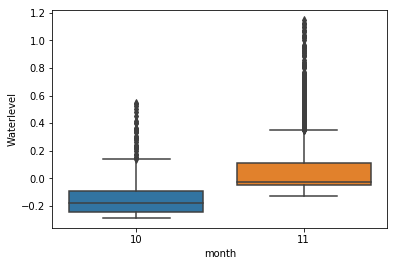

In [7]:
# graficar Boxplots por mes
# Biblioteca Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="Waterlevel", data=dfsarg)
plt.show()

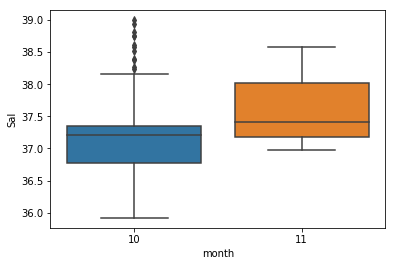

In [9]:
# graficar Boxplots por mes
# Biblioteca Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="Sal", data=dfsani)
plt.show()

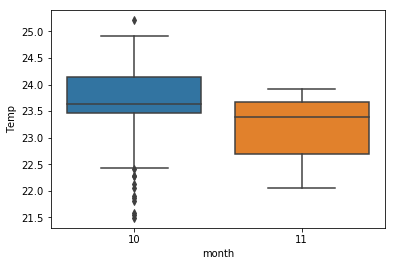

In [11]:
# graficar Boxplots por mes
# Biblioteca Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="Temp", data=dfsani)
plt.show()

In [12]:
dfsarg.describe()

,#,Abspres,Temp,Waterlevel,month
count,2395.00000,2395.000000,2395.000000,2395.000000,2395.000000
mean,1198.00000,107.429820,23.120315,0.030845,10.781211
std,691.52127,2.371366,0.564123,0.235926,0.413512
min,1.00000,104.229000,21.760000,-0.288000,10.000000
25%,599.50000,106.407000,22.525000,-0.071000,11.000000
50%,1198.00000,106.764000,23.388000,-0.035000,11.000000
75%,1796.50000,107.303000,23.484000,0.018500,11.000000
max,2395.00000,118.641000,24.448000,1.146000,11.000000


In [13]:
dfsani.describe()

,#,CondhR,Temp,SpecCon,Sal,month
count,2395.00000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,1198.00000,54524.973027,23.317436,56385.960835,37.479086,10.780793
std,691.52127,11.874193,0.548286,620.837037,0.465969,0.413795
min,1.00000,54105.700000,21.490000,54301.200000,35.919500,10.000000
25%,599.50000,54525.500000,22.730000,55949.700000,37.151400,11.000000
50%,1198.00000,54525.500000,23.490000,56185.600000,37.328300,11.000000
75%,1796.50000,54525.500000,23.700000,57053.700000,37.980300,11.000000
max,2395.00000,54525.500000,25.210000,58398.700000,38.994200,11.000000


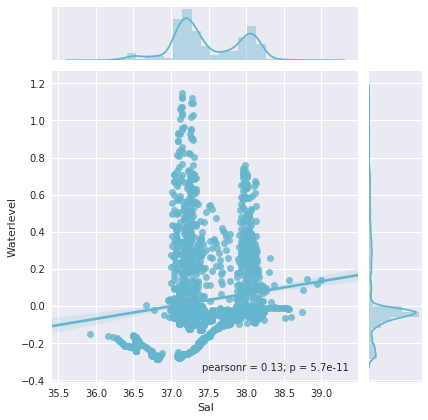

In [27]:
# Gráfica de Nivel de mar-Salinidad
sns.set(style="darkgrid", color_codes=True)
dfjuntos=pd.concat([dfsarg, dfsani], axis=1, join_axes=[dfsani.index])
g = sns.jointplot("Sal", "Waterlevel", data=dfjuntos,kind="reg", color="c")
plt.show(g)

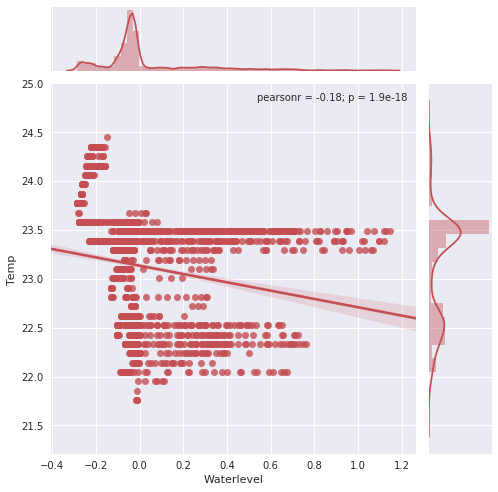

In [31]:
#Nivel del agua-temperatura
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Waterlevel","Temp", data=dfsarg, kind="reg",
                   color="r", size=7)
plt.show(g)

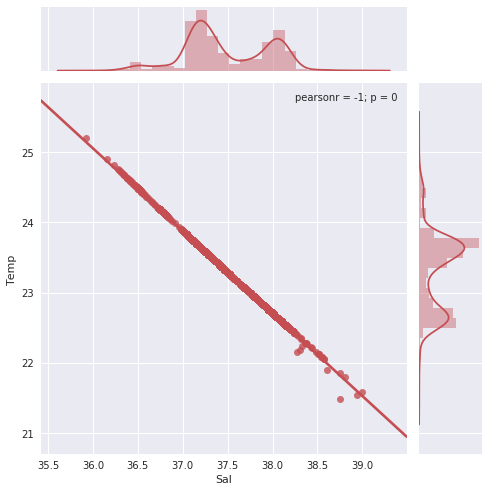

In [32]:
#Salinidad-Temperatura
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Sal","Temp", data=dfsani, kind="reg",
                   color="r", size=7)
plt.show(g)

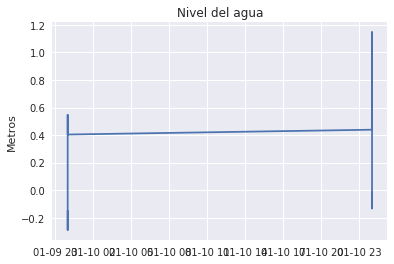

In [42]:

plt.plot_date(x=dfsani.month, y=dfsarg.Waterlevel, fmt="b-")
plt.title("Nivel del agua")
plt.ylabel("Metros")
plt.grid(True)
plt.show()


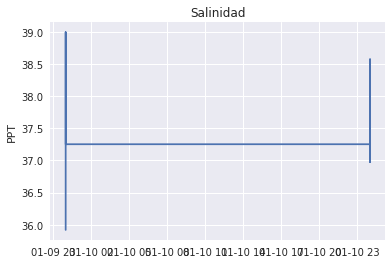

In [44]:

plt.plot_date(x=dfsani.month, y=dfsani.Sal, fmt="b-")
plt.title("Salinidad")
plt.ylabel("PPT")
plt.grid(True)
plt.show()


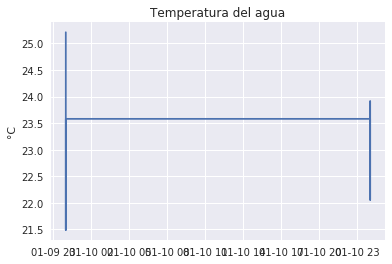

In [47]:

plt.plot_date(x=dfsani.month, y=dfsani.Temp, fmt="b-")
plt.title("Temperatura del agua")
plt.ylabel("°C")
plt.grid(True)
plt.show()


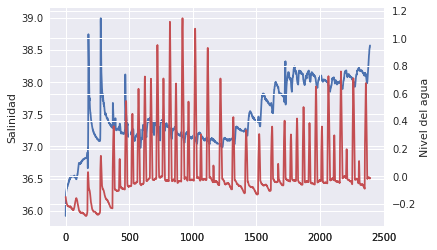

In [50]:
from pylab import figure, show, legend, ylabel
fig1 = figure()

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(dfsani['Sal'], 'b-')
ylabel("Salinidad")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(dfsarg['Waterlevel'], 'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Nivel del agua")
 
show()

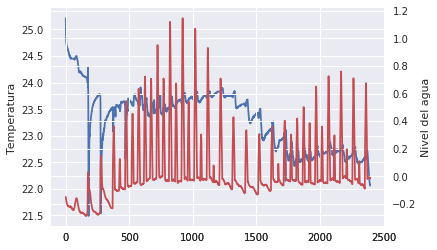

In [51]:
from pylab import figure, show, legend, ylabel
fig1 = figure()

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(dfsani['Temp'], 'b-')
ylabel("Temperatura")
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(dfsarg['Waterlevel'], 'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Nivel del agua")
xlim= 
show()

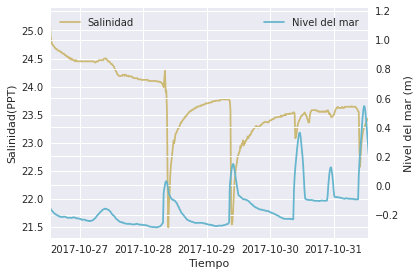

In [77]:
fig, ax1 = plt.subplots()
date=dfsani['Ndate']
temp=dfsani.Temp
WL=dfsarg.Waterlevel
ax1.plot(date,temp,'y-', label='Salinidad'); plt.legend(loc='upper left')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Salinidad(PPT)')
ax2 = ax1.twinx()
ax2.plot(date, WL , 'c-', label='Nivel del mar'); plt.legend(loc='upper right')
ax2.set_ylabel('Nivel del mar (m)')
fig.tight_layout()
plt.xlim(("10/26/2017 13:00:00"," 10/31/2017 13:00:00"))
plt.show()